# Most forked Computational Neuroscience repositories
As of May 12 2022 at 4:41 pm CST

In [1]:
cnl = ["NeuromatchAcademy/course-content",
"cnrl/cns-project-template",
"translationalneuromodeling/tapas",
"ContextLab/computational-neuroscience",
"computational-neuroscience/Computational-Neuroscience-UW",
"neurolib-dev/neurolib",
"simetenn/uncertainpy",
"CompCogNeuro/sims",
"compmem/compsy",
"conorhoughton/COMS30127",
"ashumeow/Computational-NeuroScience",
"kuz/Computational-Neuroscience-Course",
"INCF/neuroshapes",
"CompCogNeuro/ed4",
"alisharifi2000/CS-SBU-ComputationalNeuroScience2021-projects",
"karnigili/Computational-Neuroscience",
"robclewley/compneuro",
"btel/python-in-neuroscience-tutorials",
"neurodebian/neurodebian",
"alfredcai/Coursera-Computational-NeuroScience",
"neurodata/brainlit",
"patrickmineault/xcorr-notebooks",
"ITNG/ModelingNeuralDynamics",
"CNS-OIST/a310_cns_2018",
"rougier/Neurosciences"]

In [2]:
REPOS = [ 
"ccxt/ccxt",
"openssl/openssl",
"HelloZeroNet/ZeroNet",
"freqtrade/freqtrade",
"amark/gun",
"brix/crypto-js",
"google/tink",
"jedisct1/libsodium",
"krzyzanowskim/CryptoSwift",
"cryptomator/cryptomator",
"bitwiseshiftleft/sjcl",
"ctf-wiki/ctf-wiki",
"StockSharp/StockSharp",
"pyca/cryptography",
"digitalbazaar/forge",
"aws/s2n-tls",
"hummingbot/hummingbot",
"google/end-to-end",
"PrivateBin/PrivateBin",
"CryptoSignal/Crypto-Signal",
"jesse-ai/jesse",
"trustwallet/assets",
"Mbed-TLS/mbedtls",
"bitpay/wallet",
"Haehnchen/crypto-trading-bot",

"NASAWorldWind/WebWorldWind", 
"r-spacex/SpaceX-API", 
"nasa/fprime", 
"NASAWorldWind/WorldWindJava", 
"nasa-gibs/worldview", 
"nasa/apod-api", 
"chrislgarry/Apollo-11", 
"nasa/NASA-3D-Resources", 
"nasa/astrobee", 
"bloominstituteoftechnology/nasa-photo-of-the-day", 
"nasa/Open-Source-Catalog", 
"nasa/CrisisMappingToolkit",
"nasa/code-nasa-gov", 
"nasa/earthdata-search",
"NASAWorldWind/WorldWindAndroid", 
"spaceship-prompt/spaceship-prompt",
"rt-bishop/Look4Sat", 
"nasa-jpl/COVID-19-respirators",
"jakiestfu/himawari.js", 
"orbitalindex/awesome-space", 
"CelestiaProject/Celestia", 
"trehn/termtrack", 
"barrosfilipe/Rocket-Lab-API", 
"Trinitui/Rocket-Lab-API-Reborn", 
"Onnamission/SpaceX-Analytics", 

"NeuromatchAcademy/course-content",
"cnrl/cns-project-template",
"translationalneuromodeling/tapas",
"ContextLab/computational-neuroscience",
"computational-neuroscience/Computational-Neuroscience-UW",
"neurolib-dev/neurolib",
"simetenn/uncertainpy",
"CompCogNeuro/sims",
"compmem/compsy",
"conorhoughton/COMS30127",
"ashumeow/Computational-NeuroScience",
"kuz/Computational-Neuroscience-Course",
"INCF/neuroshapes",
"CompCogNeuro/ed4",
"alisharifi2000/CS-SBU-ComputationalNeuroScience2021-projects",
"karnigili/Computational-Neuroscience",
"robclewley/compneuro",
"btel/python-in-neuroscience-tutorials",
"neurodebian/neurodebian",
"alfredcai/Coursera-Computational-NeuroScience",
"neurodata/brainlit",
"patrickmineault/xcorr-notebooks",
"ITNG/ModelingNeuralDynamics",
"CNS-OIST/a310_cns_2018",
"rougier/Neurosciences",

"ossu/computer-science",
"hyperledger-archives/education-cryptomoji",
"DataONEorg/Education",
"data-edu/data-science-in-education",
"yrgo/awesome-educational-games", 
"AgoraIO-Usecase/eEducation",
"WikiEducationFoundation/WikiEduDashboard",
"puppetlabs/education-builds",
"sugarlabs/musicblocks",
"microsoft/Web-Dev-For-Beginners",
"jakemdrew/EducationDataNC",
"shama/letswritecode",
"ossu/math",
"CTFd/CTFd",
"anton-liauchuk/educational-platform",
"Akshima-Ghai/OneEducationalWebsiteForAll",
"llSourcell/Watch-Me-Build-an-Education-Startup",
"tecladocode/rest-apis-flask-python",
"psi4/psi4numpy",
"unstructuredstudio/zubhub",
"zero-to-mastery/start-here-guidelines",
"getify/Functional-Light-JS",
"arschles/go-in-5-minutes",
"mikesprague/udacity-nanodegrees",
"microsoft/Industry-Accelerator-Education",
]

In [3]:
# len(set(REPOS))

In [4]:
import unicodedata
import re
import json
import os

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

import pandas as pd
import wrangle

pd.options.display.max_colwidth = 100
pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

## Acquire

In [5]:
data = pd.read_json('data.json')

In [6]:
data.shape

(124, 3)

## Prepare

In [7]:
def basic_clean(instr):
    '''
    Clean our data by making everything lowercase, normalize unicode characters, and removing unwanted characters
    '''
    # Lower case
    instr = instr.lower()
    # Normalize
    instr = unicodedata.normalize('NFKD' , instr).encode('ascii','ignore').decode('utf-8', 'ignore')
    # remove unwanted characters
    instr = re.sub(f"[^a-z0-9'\s]", '', instr)
    # Return the cleaned string
    return instr

In [8]:
data['clean_text'] = [basic_clean(readme) for readme in data.readme_contents]

In [9]:
def tokenize(instr):
    '''
    Tokenize the target string. We breakup words and puctuation into descrete units
    '''
    
    tokenizer = ToktokTokenizer()
    
    instr = tokenizer.tokenize(instr, return_str = True)
    
    return instr

In [10]:
data.clean_text = [tokenize(readme) for readme in data.clean_text]

In [11]:
# def stem(instr):
#     '''
#     '''
    
#     ps = nltk.porter.PorterStemmer()
    
#     stems = [ps.stem(word) for word in instr.split()]
    
#     instr = ' '.join(stems)
    
#     return instr

In [12]:
# data['stem'] = [stem(readme) for readme in data.clean]

In [13]:
def lemmatize(instr):
    '''
    
    '''
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    lemmas = [wnl.lemmatize(word) for word in instr.split()]
    
    instr = ' '.join(lemmas)
    
    return instr

In [14]:
data.clean_text = [lemmatize(readme) for readme in data.clean_text]

In [15]:
def remove_stopwords(instr, extra_words = [], exclude_words= []):
    '''
    
    '''
    
    stopword_list = stopwords.words('english')
    
    if exclude_words: 
        for word in exclude_words:
            stopword_list.remove(word)
    
    if extra_words:
        for word in extra_words:
            stopword_list.append(word)
    
    words = instr.split()
    
    filtered_words = [w for w in words if w not in stopword_list]
    
    words_removed = ' '.join(filtered_words)
    
    return words_removed

In [16]:
data.clean_text = [remove_stopwords(readme) for readme in data.clean_text]

In [17]:
# def clean(text: str) -> list:
#     'A simple function to cleanup text data'
#     wnl = nltk.stem.WordNetLemmatizer()
#     stopwords = set(nltk.corpus.stopwords.words('english'))
#     text = (text.encode('ascii', 'ignore')
#              .decode('utf-8', 'ignore')
#              .lower())
#     words = re.sub(r'[^\w\s]', '', text).split() # tokenization
#     return [wnl.lemmatize(word) for word in words if word not in stopwords]

# data['clean_text'] = data.readme_contents.apply(clean).apply(' '.join)

## Explore

In [18]:
# labels = pd.concat([data.language.value_counts(dropna=False), data.language.value_counts(normalize=True)], axis=1)
# labels.columns = ['n', 'percent']
# #labels

In [19]:
#data.language.value_counts(dropna=False)

In [20]:
#data[['repo']][data.language.isnull()]

In [21]:
# lang_df = pd.DataFrame()
# for lang in data.language.unique():
#     lang_df[lang] = ' '.join(data.readme_contents[data.language == lang].dropna())

In [22]:
# word_counts.sort_values(by='javascript_freq',ascending=False).head(10)

In [23]:
#sns.catplot(x='index',y='javascript_freq',data=jsf,kind='bar' )

In [24]:
# jsf = pd.DataFrame(word_counts['javascript_freq'].sort_values(ascending=False).head(10)).reset_index()
# jsf

In [25]:
# top_five = data.language.value_counts(dropna=True).head(5).index
# top_five

In [26]:
# pd.DataFrame(word_counts[lang].sort_values(ascending=False).reset_index()[lang] > 0).sum().values[0]

In [27]:
# unique words
# len(set(data.clean_text[0].split()))

In [28]:
# words
# len(data.clean_text[0].split())

In [29]:
# word_counts.reset_index().pivot(index=word_counts.index,columns=word_counts.columns,values=word_counts.values)

In [30]:
# word_counts['groff_freq'].sort_values(ascending=False).sum()

In [31]:
# (word_counts.javascript_freq != 0).sum()

##  Question 1 
Do different programming languages use a different number of unique words?

In [32]:
javascript = ' '.join(data.clean_text[data.language == 'JavaScript'])
c = ' '.join(data.clean_text[data.language == 'C'])
jupyter_notebook = ' '.join(data.clean_text[data.language == 'Jupyter Notebook'])
python = ' '.join(data.clean_text[data.language == 'Python'])
cplusplus = ' '.join(data.clean_text[data.language == 'C++'])
swift = ' '.join(data.clean_text[data.language == 'Swift'])
java = ' '.join(data.clean_text[data.language == 'Java'])
csharp = ' '.join(data.clean_text[data.language == 'C#'])
php = ' '.join(data.clean_text[data.language == 'PHP'])
typescript = ' '.join(data.clean_text[data.language == 'TypeScript'])
assembly = ' '.join(data.clean_text[data.language == 'Assembly'])
mathematica = ' '.join(data.clean_text[data.language == 'Mathematica'])
css = ' '.join(data.clean_text[data.language == 'CSS'])
kotlin = ' '.join(data.clean_text[data.language == 'Kotlin'])
g_code = ' '.join(data.clean_text[data.language == 'G-code'])
ruby = ' '.join(data.clean_text[data.language == 'Ruby'])
r = ' '.join(data.clean_text[data.language == 'R'])
tex = ' '.join(data.clean_text[data.language == 'TeX'])
go = ' '.join(data.clean_text[data.language == 'Go'])
groff = ' '.join(data.clean_text[data.language == 'Groff'])
html = ' '.join(data.clean_text[data.language == 'HTML'])
shell = ' '.join(data.clean_text[data.language == 'Shell'])
objective_c = ' '.join(data.clean_text[data.language == 'Objective-C'])

matlab = data.clean_text[data.language == 'MATLAB']
matlab = matlab.append(data.clean_text[data.language == 'Matlab'])
matlab = ' '.join(matlab)

In [33]:
javascript_freq = pd.Series(javascript.split()).value_counts()
c_freq = pd.Series(c.split()).value_counts()
jupyter_notebook_freq = pd.Series(jupyter_notebook.split()).value_counts()
python_freq = pd.Series(python.split()).value_counts()
cplusplus_freq = pd.Series(cplusplus.split()).value_counts()
swift_freq = pd.Series(swift.split()).value_counts()
java_freq = pd.Series(java.split()).value_counts()
csharp_freq = pd.Series(csharp.split()).value_counts()
php_freq = pd.Series(php.split()).value_counts()
typescript_freq = pd.Series(typescript.split()).value_counts()
assembly_freq = pd.Series(assembly.split()).value_counts()
mathematica_freq = pd.Series(mathematica.split()).value_counts()
css_freq = pd.Series(css.split()).value_counts()
kotlin_freq = pd.Series(kotlin.split()).value_counts()
g_code_freq = pd.Series(g_code.split()).value_counts()
ruby_freq = pd.Series(ruby.split()).value_counts()
r_freq = pd.Series(r.split()).value_counts()
tex_freq = pd.Series(tex.split()).value_counts()
go_freq = pd.Series(go.split()).value_counts()
groff_freq = pd.Series(groff.split()).value_counts()
html_freq = pd.Series(html.split()).value_counts()
shell_freq = pd.Series(shell.split()).value_counts()
objective_c_freq = pd.Series(objective_c.split()).value_counts()
matlab_freq = pd.Series(matlab.split()).value_counts()

In [34]:
total_word_counts = (pd.concat([javascript_freq,\
                          c_freq,\
                          jupyter_notebook_freq,\
                          python_freq,\
                          tex_freq,\
                          cplusplus_freq,\
                          swift_freq,\
                          java_freq,\
                          csharp_freq,\
                          php_freq,\
                          typescript_freq,\
                          assembly_freq,\
                          mathematica_freq,\
                          css_freq,\
                          kotlin_freq,\
                          g_code_freq,\
                          ruby_freq,\
                          r_freq,\
                          go_freq,\
                          groff_freq,\
                          html_freq,\
                          shell_freq,\
                          matlab_freq],\
                        axis = 1, sort = True)
               .set_axis(['javascript_freq',
                          'c_freq',
                          'jupyter_notebook_freq',
                          'python_freq',
                          'tex_freq',
                          'cplusplus_freq',
                          'swift_freq',
                          'java_freq',
                          'csharp_freq',
                          'php_freq',
                          'typescript_freq',
                          'assembly_freq',
                          'mathematica_freq',
                          'css_freq',
                          'kotlin_freq',
                          'g_code_freq',
                          'ruby_freq',
                          'r_freq',
                          'go_freq',
                          'groff_freq',
                          'html_freq',
                          'shell_freq',
                          'matlab_freq'
                         ], axis =1, inplace = False)
              .fillna(0)
              .apply(lambda s:s.astype(int)))

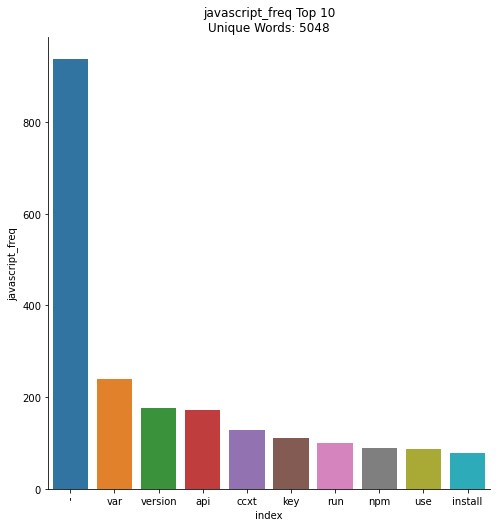

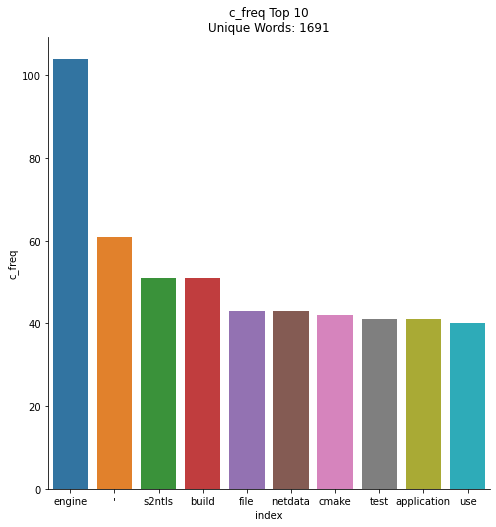

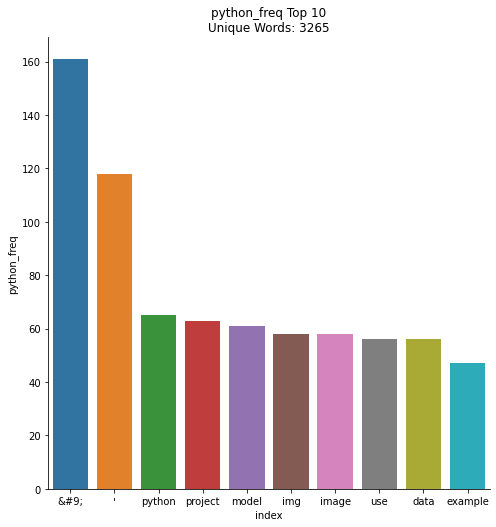

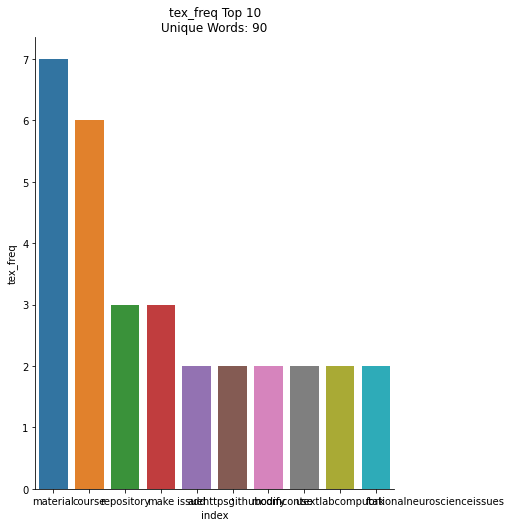

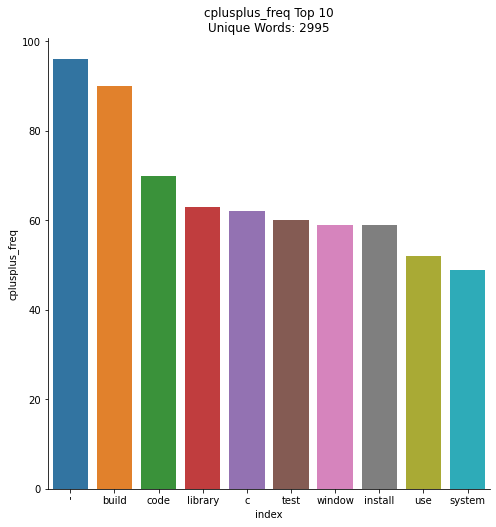

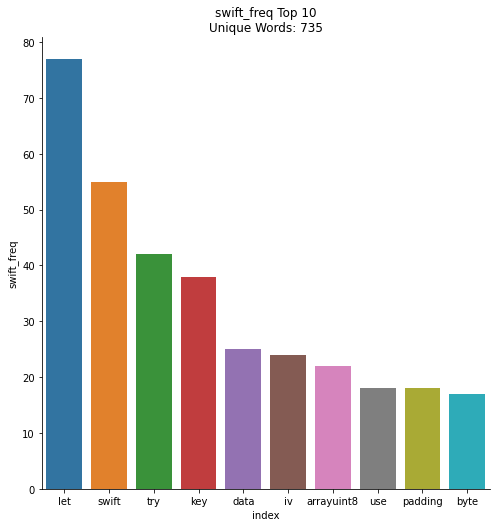

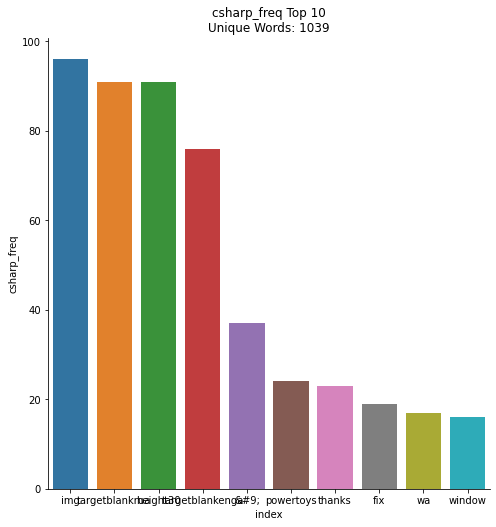

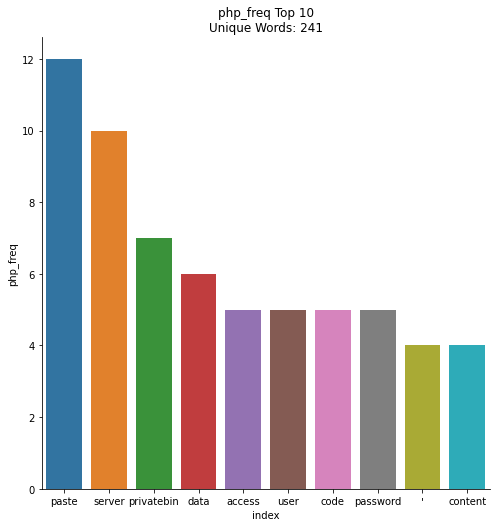

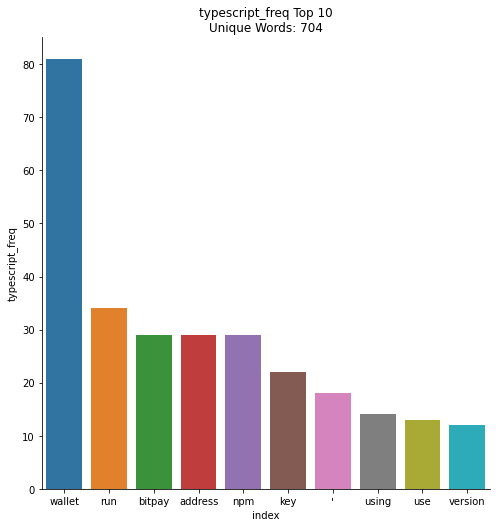

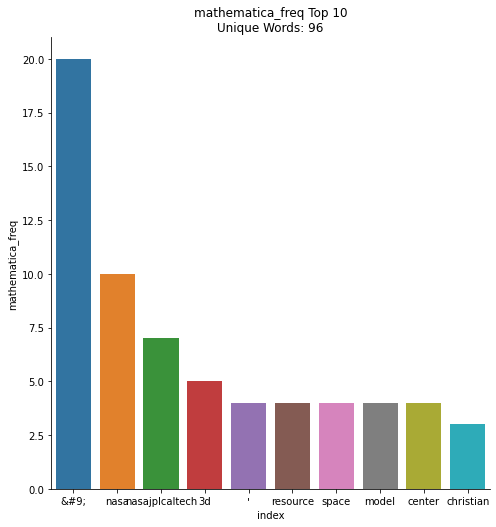

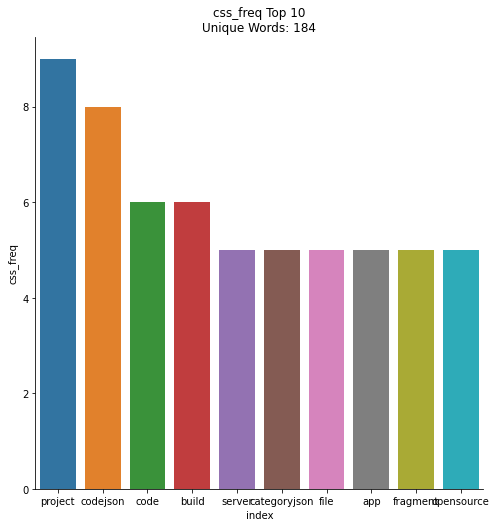

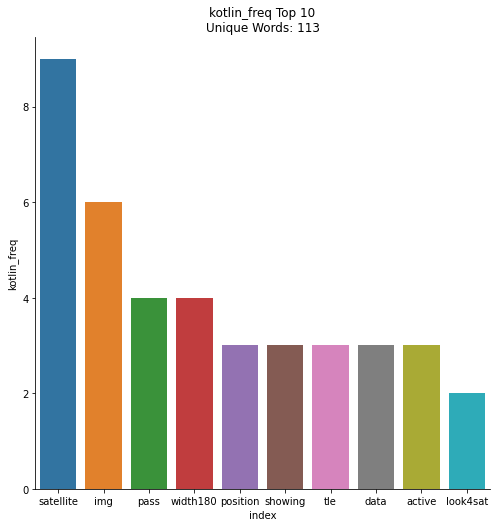

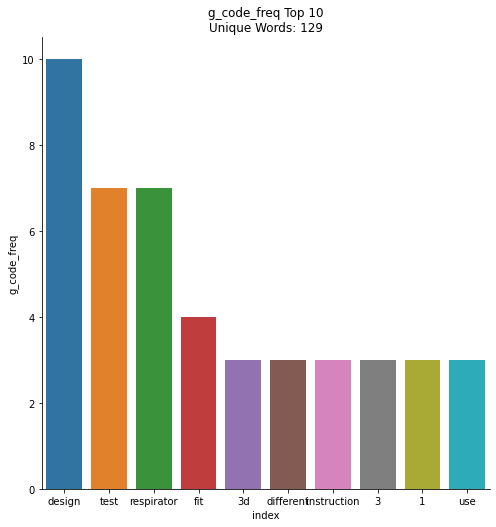

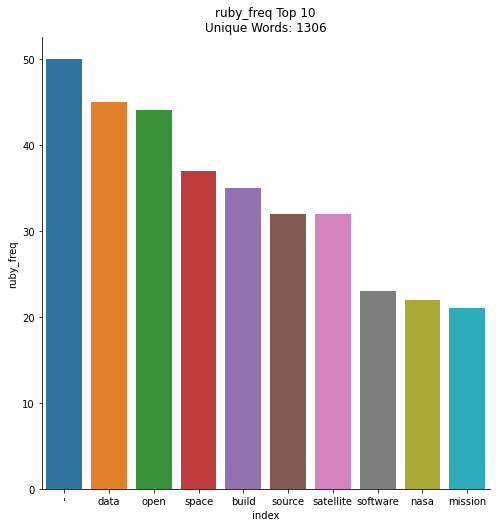

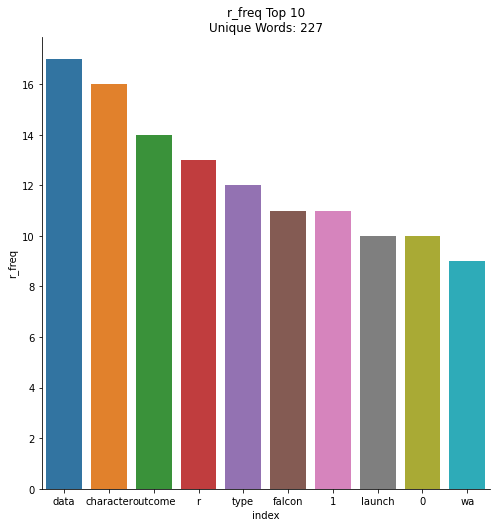

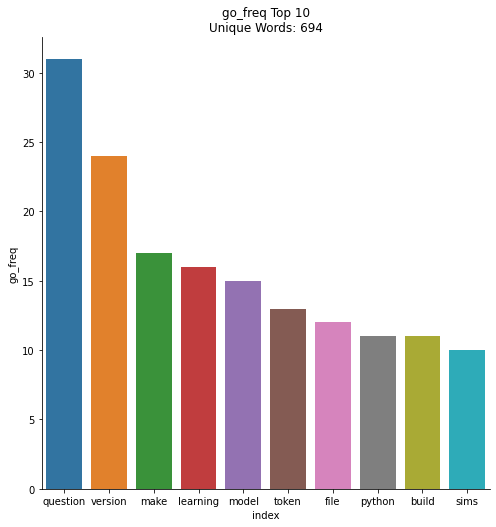

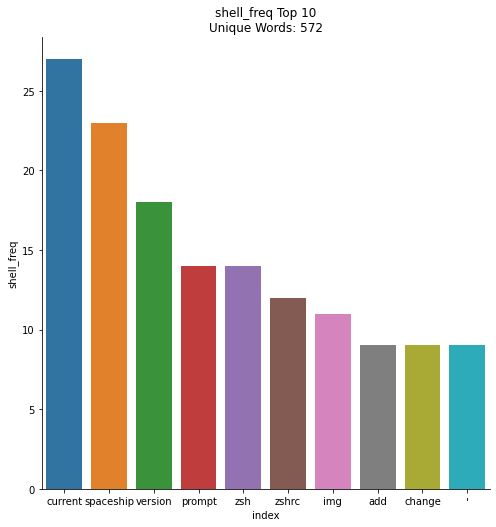

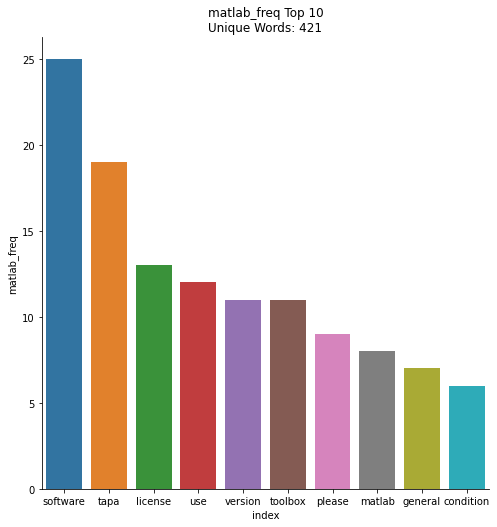

In [171]:
# Data Viz of each language top 10 words over all with overall unique word counts in title
import seaborn as sns
import matplotlib.pyplot as plt
for lang in total_word_counts.columns:
    count = pd.DataFrame(total_word_counts[lang].sort_values(ascending=False).reset_index()[lang] > 0).sum().values[0]
    sns.catplot(x='index', y = lang,
                  data = pd.DataFrame(total_word_counts[lang]
                                      .sort_values(ascending=False).head(10)).reset_index(),kind='bar',height=7)
    plt.title(f'{lang} Top 10\nUnique Words: {count}')
    plt.show()

## Question 2 
Are counts per document and across the df different for each language?

In [37]:
data.head()

repo    language  \
0             ccxt/ccxt  JavaScript   
1       openssl/openssl           C   
2  HelloZeroNet/ZeroNet  JavaScript   
3   freqtrade/freqtrade      Python   
4             amark/gun  JavaScript   

                                                                                       readme_contents  \
0  # CCXT – CryptoCurrency eXchange Trading Library\n\n[![Build Status](https://travis-ci.com/ccxt/...   
1  Engines\n=======\n\nDeprecation Note\n----------------\n\nThe ENGINE API was introduced in OpenS...   
2  # ZeroNet [![Build Status](https://travis-ci.org/HelloZeroNet/ZeroNet.svg?branch=master)](https:...   
3  # ![freqtrade](https://raw.githubusercontent.com/freqtrade/freqtrade/develop/docs/assets/freqtra...   
4  <p id="readme"><a href="https://gun.eco/"><img width="40%" src="https://cldup.com/TEy9yGh45l.svg...   

                                                                                            clean_text  
0  ccxt cryptocurrency exchange trading library build statushttpstraviscicomccxtccxtsvgbranchmaster...  
1  engine deprecation note engine api wa introduced openssl version 096 low level interface adding ...  
2  zeronet build statushttpstravisciorghellozeronetzeronetsvgbranchmasterhttpstravisciorghellozeron...  
3  freqtradehttpsrawgithubusercontentcomfreqtradefreqtradedevelopdocsassetsfreqtradepoweredbysvg fr...  
4  p idreadmea hrefhttpsgunecoimg width40 srchttpscldupcomtey9ygh45lsvgaimg width50 alignright vspa...

In [38]:
# Apply counts to each document
data['word_counts'] = data.clean_text.apply(lambda x : len(x.split()))
data['unique_word_counts'] = data.clean_text.apply(lambda x : len(set(x.split())))

In [39]:
# Average unique word count per document for each language
data.groupby('language').unique_word_counts.mean().sort_values(ascending=False)

language
Swift               735.000000
C#                  542.000000
Ruby                478.000000
C                   451.600000
Java                420.166667
Objective-C         410.000000
MATLAB              396.000000
TypeScript          379.500000
Go                  372.500000
JavaScript          328.041667
C++                 311.500000
Shell               293.000000
Python              252.000000
HTML                244.529412
PHP                 241.000000
R                   227.000000
CSS                 184.000000
Jupyter Notebook    142.181818
G-code              129.000000
Assembly            125.000000
Kotlin              113.000000
Mathematica          96.000000
TeX                  46.000000
Groff                41.000000
Matlab               30.000000
Name: unique_word_counts, dtype: float64

In [40]:
# Average word count per document for each language
data.groupby('language').word_counts.mean().sort_values(ascending=False)

language
Swift               1689.000000
C#                  1055.000000
C                    949.200000
Ruby                 946.333333
Objective-C          942.000000
Java                 843.333333
TypeScript           814.500000
JavaScript           708.208333
MATLAB               683.000000
Go                   659.500000
C++                  552.125000
R                    526.000000
Shell                489.500000
HTML                 461.588235
Python               458.950000
PHP                  352.000000
CSS                  308.000000
Jupyter Notebook     242.727273
G-code               195.000000
Mathematica          170.000000
Assembly             165.000000
Kotlin               153.000000
TeX                   58.500000
Groff                 57.000000
Matlab                33.000000
Name: word_counts, dtype: float64

In [41]:
# Total word count across the dataframe per language
total_word_counts.sum().sort_values(ascending=False)

javascript_freq          16997
python_freq               9179
cplusplus_freq            8834
html_freq                 7847
java_freq                 5060
c_freq                    4746
ruby_freq                 2839
jupyter_notebook_freq     2670
csharp_freq               2110
swift_freq                1689
typescript_freq           1629
go_freq                   1319
shell_freq                 979
matlab_freq                716
r_freq                     526
php_freq                   352
css_freq                   308
g_code_freq                195
mathematica_freq           170
assembly_freq              165
kotlin_freq                153
tex_freq                   117
groff_freq                  57
dtype: int64

In [42]:
# Total unique words across the dataframe per langauge
(total_word_counts != 0).sum().sort_values(ascending=False)

javascript_freq          5048
python_freq              3265
cplusplus_freq           2995
html_freq                2710
java_freq                2001
c_freq                   1691
ruby_freq                1306
jupyter_notebook_freq    1190
csharp_freq              1039
swift_freq                735
typescript_freq           704
go_freq                   694
shell_freq                572
matlab_freq               421
php_freq                  241
r_freq                    227
css_freq                  184
g_code_freq               129
assembly_freq             125
kotlin_freq               113
mathematica_freq           96
tex_freq                   90
groff_freq                 41
dtype: int64

## Question 3

What am I doing with this modeling? 

In [44]:
data.head()

repo    language  \
0             ccxt/ccxt  JavaScript   
1       openssl/openssl           C   
2  HelloZeroNet/ZeroNet  JavaScript   
3   freqtrade/freqtrade      Python   
4             amark/gun  JavaScript   

                                                                                       readme_contents  \
0  # CCXT – CryptoCurrency eXchange Trading Library\n\n[![Build Status](https://travis-ci.com/ccxt/...   
1  Engines\n=======\n\nDeprecation Note\n----------------\n\nThe ENGINE API was introduced in OpenS...   
2  # ZeroNet [![Build Status](https://travis-ci.org/HelloZeroNet/ZeroNet.svg?branch=master)](https:...   
3  # ![freqtrade](https://raw.githubusercontent.com/freqtrade/freqtrade/develop/docs/assets/freqtra...   
4  <p id="readme"><a href="https://gun.eco/"><img width="40%" src="https://cldup.com/TEy9yGh45l.svg...   

                                                                                            clean_text  \
0  ccxt cryptocurrency exchange trading library build statushttpstraviscicomccxtccxtsvgbranchmaster...   
1  engine deprecation note engine api wa introduced openssl version 096 low level interface adding ...   
2  zeronet build statushttpstravisciorghellozeronetzeronetsvgbranchmasterhttpstravisciorghellozeron...   
3  freqtradehttpsrawgithubusercontentcomfreqtradefreqtradedevelopdocsassetsfreqtradepoweredbysvg fr...   
4  p idreadmea hrefhttpsgunecoimg width40 srchttpscldupcomtey9ygh45lsvgaimg width50 alignright vspa...   

   word_counts  unique_word_counts  
0         2378                1050  
1         1350                 520  
2          267                 171  
3          756                 418  
4         1229                 751

In [64]:
def idf(word):
    n_occurences = sum([1 for doc in data.clean_text if word in doc])
    return len(data.clean_text) / n_occurences

unique_words_full_df = pd.Series(' '.join(data.clean_text).split()).unique()

(pd.DataFrame(dict(word=unique_words_full_df)).assign(idf=lambda df: df.word.apply(idf))
.set_index('word').sort_values(by='idf', ascending=False).head(10))

idf
word                                                                    
httpsgithubcomfacebookfollygit                                     124.0
coupledclusterhttpsgithubcompsi4psi4numpytreemastercoupledcluster  124.0
jules                                                              124.0
nascimento                                                         124.0
sirianni                                                           124.0
reposititory                                                       124.0
professor                                                          124.0
hardwigg                                                           124.0
taghttpsgithubcompsi4psi4numpytreev01beta                          124.0
v01beta                                                            124.0

In [125]:
# data[['repo','clean_text']].set_index('repo')

In [131]:
tfs = []

# We'll caclulate the tf-idf value for every word across every document

# Start by iterating over all the documents
for doc, text in enumerate(data.clean_text):
    # We'll make a data frame that contains the tf for every word in every document
    df = (pd.Series(text.split())
          .value_counts()
          .reset_index()
          .set_axis(['word', 'raw_count'], axis=1, inplace=False)
          .assign(tf=lambda df: df.raw_count / df.shape[0])
          .drop(columns='raw_count')
          .assign(doc=data.repo[doc]))
    # Then add that data frame to our list
    tfs.append(df)

# We'll then concatenate all the tf values together.
word_df = (pd.concat(tfs)
 # calculate the idf value for each word
 .assign(idf=lambda df: df.word.apply(idf))
 # then use the if and idf values to calculate tf-idf 
 .assign(tf_idf=lambda df: df.idf * df.tf)
 .drop(columns=['tf', 'idf'])
 .sort_values(by='tf_idf', ascending=False)
 .pipe(lambda df: pd.crosstab(df.doc, df.word, values=df.tf_idf, aggfunc=lambda x: x))
 .fillna(0))

In [172]:
word_df.head()

word                                      &#9;         '       0   00  0000  \
doc                                                                           
AgoraIO-Usecase/eEducation                 0.0  0.010081  0.0000  0.0   0.0   
Akshima-Ghai/OneEducationalWebsiteForAll   0.0  0.015481  0.0043  0.0   0.0   
BustByte/coronastatus                      0.0  0.013988  0.0000  0.0   0.0   
CNS-OIST/a310_cns_2018                     0.0  0.000000  0.0000  0.0   0.0   
CTFd/CTFd                                  0.0  0.013376  0.0000  0.0   0.0   

word                                      000030  000200  001  0013  0015  \
doc                                                                         
AgoraIO-Usecase/eEducation                   0.0     0.0  0.0   0.0   0.0   
Akshima-Ghai/OneEducationalWebsiteForAll     0.0     0.0  0.0   0.0   0.0   
BustByte/coronastatus                        0.0     0.0  0.0   0.0   0.0   
CNS-OIST/a310_cns_2018                       0.0     0.0  0.0   0.0   0.0   
CTFd/CTFd                                    0.0     0.0  0.0   0.0   0.0   

word                                      0016  005  0075  \
doc                                                         
AgoraIO-Usecase/eEducation                 0.0  0.0   0.0   
Akshima-Ghai/OneEducationalWebsiteForAll   0.0  0.0   0.0   
BustByte/coronastatus                      0.0  0.0   0.0   
CNS-OIST/a310_cns_2018                     0.0  0.0   0.0   
CTFd/CTFd                                  0.0  0.0   0.0   

word                                      00httpsmybinderorgv2ghneurolibdevneurolibmasterfilepathexamples2fexample0alnminimalipynb  \
doc                                                                                                                                  
AgoraIO-Usecase/eEducation                                                                                                     0.0   
Akshima-Ghai/OneEducationalWebsiteForAll                                                                                       0.0   
BustByte/coronastatus                                                                                                          0.0   
CNS-OIST/a310_cns_2018                                                                                                         0.0   
CTFd/CTFd                                                                                                                      0.0   

word                                       01  0100  \
doc                                                   
AgoraIO-Usecase/eEducation                0.0   0.0   
Akshima-Ghai/OneEducationalWebsiteForAll  0.0   0.0   
BustByte/coronastatus                     0.0   0.0   
CNS-OIST/a310_cns_2018                    0.0   0.0   
CTFd/CTFd                                 0.0   0.0   

word                                      0100httpsgithubcomnasaworldwindwebworldwindreleases  \
doc                                                                                             
AgoraIO-Usecase/eEducation                                                                0.0   
Akshima-Ghai/OneEducationalWebsiteForAll                                                  0.0   
BustByte/coronastatus                                                                     0.0   
CNS-OIST/a310_cns_2018                                                                    0.0   
CTFd/CTFd                                                                                 0.0   

word                                      010203  010f04dgspcn  0115  0120  \
doc                                                                          
AgoraIO-Usecase/eEducation                   0.0           0.0   0.0   0.0   
Akshima-Ghai/OneEducationalWebsiteForAll     0.0           0.0   0.0   0.0   
BustByte/coronastatus                        0.0           0.0   0.0   0.0   
CNS-OIST/a310_cns_2018                       0.0           0.0   0.0   0.0   
CTFd/

### SKLEARN Modeling

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidfs = tfidf.fit_transform(data.clean_text)
tfidfs

<124x15300 sparse matrix of type '<class 'numpy.float64'>'
	with 35156 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(tfidfs.todense(), columns=tfidf.get_feature_names())

In [164]:
(data.language.value_counts() > 1)

JavaScript           True
Python               True
HTML                 True
C++                  True
Jupyter Notebook     True
Java                 True
C                    True
Ruby                 True
TeX                  True
Shell                True
TypeScript           True
Go                   True
C#                   True
Assembly            False
Mathematica         False
CSS                 False
Swift               False
Kotlin              False
G-code              False
R                   False
PHP                 False
MATLAB              False
Matlab              False
Groff               False
Objective-C         False
Name: language, dtype: bool

In [167]:
focus_lang = ['JavaScript','Python','HTML','C++','Jupyter Notebook','Java','C','Ruby','TeX','Shell','TypeScript','Go','C#']

model_me = data[data.language.isin(focus_lang)]

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(model_me.clean_text)
y = model_me.language 

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [169]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.actual, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.actual))
print('---')
print(classification_report(train.actual, train.predicted))

Accuracy: 79.78%
---
Confusion Matrix
actual            C  C#  C++  Go  HTML  Java  JavaScript  Jupyter Notebook  \
predicted                                                                    
C++               0   0   13   0     0     0           0                 0   
HTML              0   0    0   0    13     0           0                 0   
Java              0   0    0   0     0     1           0                 0   
JavaScript        4   2    0   2     0     4          19                 0   
Jupyter Notebook  0   0    0   0     0     0           0                 9   
Python            0   0    0   0     0     0           0                 0   

actual            Python  Ruby  Shell  TeX  TypeScript  
predicted                                               
C++                    0     0      0    0           0  
HTML                   0     0      0    0           0  
Java                   0     0      0    0           0  
JavaScript             0     2      0    0          

In [170]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 34.78%
---
Confusion Matrix
actual      C  C++  HTML  Java  JavaScript  Jupyter Notebook  Python  Ruby  \
predicted                                                                    
HTML        0    0     1     0           0                 0       0     0   
JavaScript  1    3     3     1           5                 1       2     1   
Python      0    0     0     0           0                 1       2     0   

actual      Shell  TeX  
predicted               
HTML            0    0  
JavaScript      1    0  
Python          0    1  
---
                  precision    recall  f1-score   support

               C       0.00      0.00      0.00         1
             C++       0.00      0.00      0.00         3
            HTML       1.00      0.25      0.40         4
            Java       0.00      0.00      0.00         1
      JavaScript       0.28      1.00      0.43         5
Jupyter Notebook       0.00      0.00      0.00         2
          Python       0.50      0.